In [ ]:
import pandas as pd
import warnings
from sklearn.datasets import load_files
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = load_files(r'/content/drive/MyDrive/Notebooks/txt_sentoken')

data , target = df.data , df.target
target_names = df.target_names

In [ ]:
data[:2], target[:2]

([b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film i

In [ ]:
target_names

['neg', 'pos']

In [ ]:
# convert data to list of string
data = [doc.decode('utf-8') for doc in data]

In [ ]:
import re
import spacy

nlp = spacy.load('en_core_web_sm')

def clean_txt(text):
  # tolower
  text = text.lower()

  # remove any non alphanumeric
  text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

  # remove any sigle character
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

  # remove extra spaces
  text = re.sub(r'\s+', ' ', text)

  doc = nlp(text)

  txt = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

  return " ".join(txt)

In [ ]:
data[0]

"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is t

In [ ]:
clean_txt(data[0])

'arnold schwarzenegger icon action enthusiast late 80 lately film sloppy liner get bad hard see arnold mr freeze batman robin especially say ton ice joke hey get 15 million matter arnold sign expensive blockbuster compare like terminator series true lie eraser call dark thriller devil gabriel byrne come earth impregnate woman robin tunney happen 1000 year basically destroy world apparently god choose man man jericho cane arnold help trusty sidekick kevin pollack stop let devil world part actually absurd fit right dogma yes film weak well blockbuster right sleepy hollow make world look like 4 star film definitely doesn like arnold movie wasn type film sure give chuckle know liner confused character film go understandable especially ending change accord source aside form walk like past film m sorry arnold maybe end action day speak action film hardly explosion fight devil place explode arnold wasn kick devil butt ending change spiritual undoubtedly ruin film hope cool ending occur let do

In [ ]:
df = pd.DataFrame({'text': data, 'target': target})
df.head()

,text,target
0,arnold schwarzenegger has been an icon for act...,0
1,good films are hard to find these days . \ngre...,1
2,quaid stars as a man who has taken up the prof...,1
3,we could paraphrase michelle pfieffer's charac...,0
4,kolya is one of the richest films i've seen in...,1


In [ ]:
df.shape

(2000, 2)

In [30]:
df.target.value_counts()

,count
target,
0,1000
1,1000


In [28]:
df['cleaned_text'] = df['text'].apply(clean_txt)
df.head()

,text,target,cleaned_text
0,arnold schwarzenegger has been an icon for act...,0,arnold schwarzenegger icon action enthusiast l...
1,good films are hard to find these days . \ngre...,1,good film hard find day great film rare proof ...
2,quaid stars as a man who has taken up the prof...,1,quaid star man take proffesion dragonslayer fe...
3,we could paraphrase michelle pfieffer's charac...,0,paraphrase michelle pfieffer character dangero...
4,kolya is one of the richest films i've seen in...,1,kolya rich film ve see time zdenek sverak play...


In [29]:
df.isna().sum()

,0
text,0
target,0
cleaned_text,0


In [31]:
X = df['cleaned_text']
y = df['target']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


estimators = {
    'lr' : LogisticRegression(),
    'svc' : SVC(),
    'lsvc' : LinearSVC(),
    'mnb' : MultinomialNB(),
    'rfc' : RandomForestClassifier()
}

params = {
    'lr' : {'C' : [0.01,0.1,1,10,100]},
    'svc' : {'C' : [0.01,0.1,1,10,100]},
    'lsvc' : {'C' : [0.01,0.1,1,10,100]},
    'mnb' : {},
    'rfc' : {'n_estimators' : [10,100,1000]}
}

best_estimator = {}

for estimator_name, estimator in estimators.items():
  grid = GridSearchCV(estimator,params[estimator_name],cv=5)
  grid.fit(X_train_tfidf,y_train)
  print(estimator_name)
  print(accuracy_score(y_test,grid.predict(X_test_tfidf)))
  best_estimator[estimator_name] = grid.best_estimator_

lr
0.8325
svc
0.825
lsvc
0.8425
mnb
0.8
rfc
0.8225


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

best_model = best_estimator['lsvc']

y_pred = best_model.predict(X_test_tfidf)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       200
           1       0.83      0.86      0.85       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



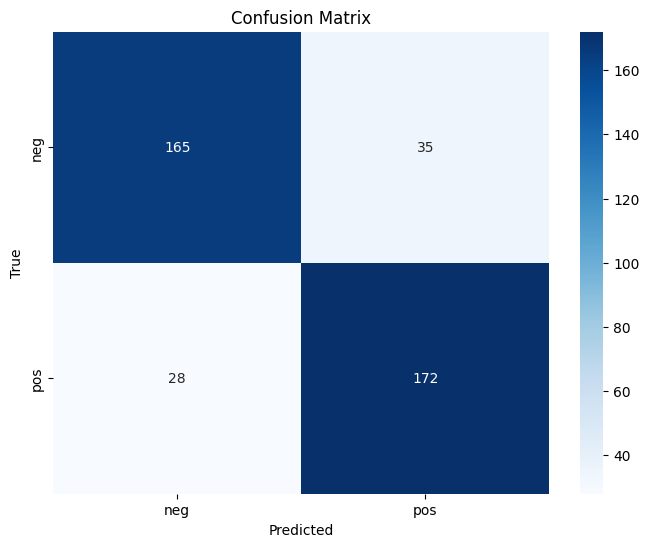

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()